In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def dataToArray(pathFile):
    with open(pathFile, 'rb') as file:
        image = fits.getdata(file)
    return image[0], image[1], image[2]   # atoms, noAtoms, dark

In [11]:
atoms, light, dark = dataToArray(pathFile)

In [14]:
np.shape(atoms)

(2160, 2560)

In [72]:
pathFile = "combinedShots.fits"
cameraHeigth = 2160
cameraWidth = 2560
atoms, light, dark = dataToArray(pathFile)

atomsX = atoms.sum(axis = 0)
atomsY = atoms.sum(axis = 1)
lightX = light.sum(axis = 0)
lightY = light.sum(axis = 1)
correction = atomsX[:1000].sum()/lightX[:1000].sum()
divided = -np.log((atoms - dark)/(light*correction - dark))

<ipython-input-72-f2ab93d5ef1c>:11: RuntimeWarning: divide by zero encountered in log
  divided = -np.log((atoms - dark)/(light*correction - dark))
<ipython-input-72-f2ab93d5ef1c>:11: RuntimeWarning: invalid value encountered in log
  divided = -np.log((atoms - dark)/(light*correction - dark))


We take an "atoms" shot, with the atomic cloud illuminated by a laser, a "light" shot with just the laser light, and a "dark" shot with nothing. Here is a typical 3-image set we take with the camera, nothing seems wrong at first sight.

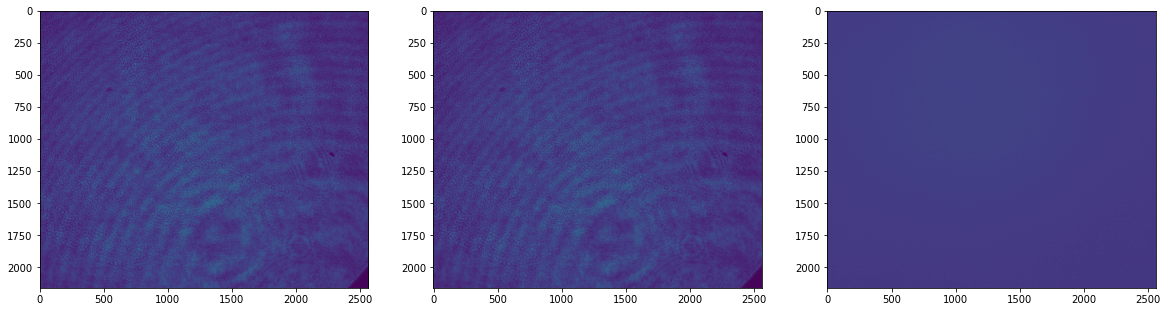

In [98]:
fig, axis = plt.subplots(1,3, figsize = (20, 6))
axis_atoms, axis_light, axis_dark = axis
axis_atoms.imshow(atoms)
axis_light.imshow(light)
axis_dark.imshow(dark)
plt.show()

We then do a division:
\[ \text{Divided_image} = -\log\left(\frac{\text{atoms} - \text{dark}}{\text{light} - \text{dark}}\right) \]
And it is on this image that we clearly see horizontal stripes. They can appear a bit anywhere, but some of the lines are recurrent. The dot around (X = 1000, Y = 1300) is our atomic cloud.

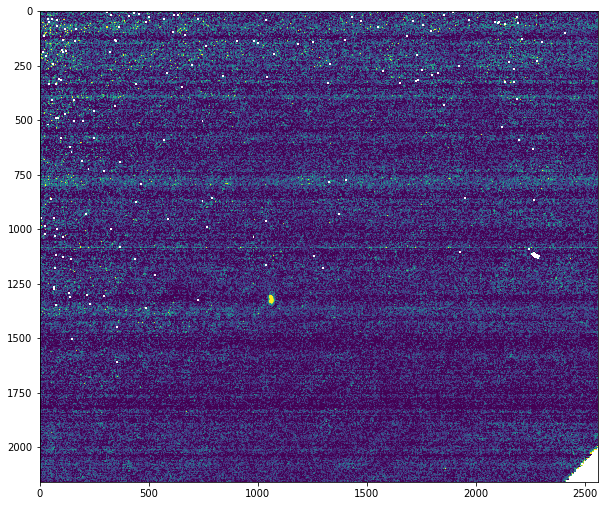

In [74]:
plt.figure(figsize = (10, 10))
plt.imshow(divided, vmin = -0.01, vmax = 0.1)
plt.show()

In [75]:
dividedX = divided.sum(axis = 0)
dividedY = divided.sum(axis = 1)
dividedX[np.isnan(dividedX)] = 0
dividedX[dividedX == np.inf] = 0
dividedX[dividedX == -np.inf] = 0
dividedY[np.isnan(dividedY)] = 0
dividedY[dividedY == np.inf] = 0
dividedY[dividedY == -np.inf] = 0

Looking at the integrated profiles from the side doesn't reveal much.

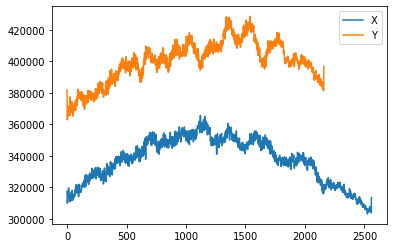

In [76]:
plt.figure()
plt.plot(atomsX, label = 'X')
plt.plot(atomsY, label = 'Y')
plt.legend()
plt.show()

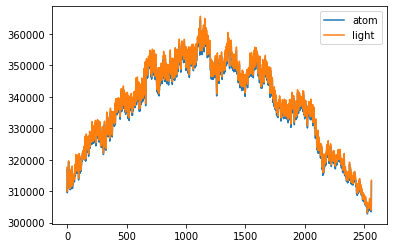

In [81]:
plt.figure()
plt.plot(lightX, label = 'atom')
plt.plot(atomsX, label = 'light')
plt.legend()
plt.show()

But looking at the divided image profile shows a huge difference for the integration along X compared to the integration along Y. There is a particular line of pixel that is problematic (and it's always the same one).

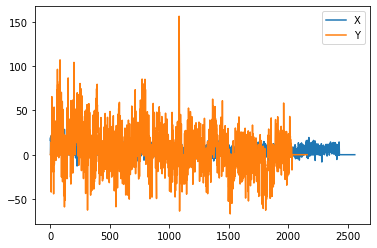

In [82]:
plt.figure()
plt.plot(dividedX, label = 'X')
plt.plot(dividedY, label = 'Y')
plt.legend()
plt.show()

In [55]:
np.argmax(dividedY)

1082

It is the line 1082. If we look back at the original picture and zoom in, we see quite clearly that 4 lines of pixels get extra counts during the light shot (FYI we first take an atom shot, and then a light shot).

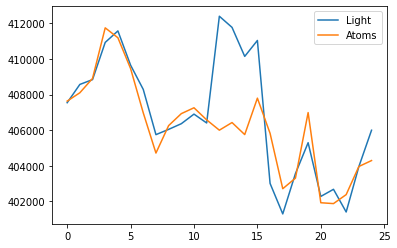

In [87]:
plt.figure()
plt.plot(lightY[1070:1095]*correction, label = 'Light')
plt.plot(atomsY[1070:1095], label = 'Atoms')
plt.legend()
plt.show()

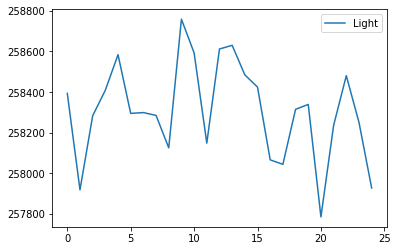

In [90]:
plt.figure()
plt.plot(dark.sum(axis = 1)[1070:1095]*correction, label = 'Light')
plt.legend()
plt.show()